In [278]:
import numpy as np
from matplotlib import pyplot as plt

In [279]:
px2m = 1000 / np.sqrt((498 - 488)**2 + (391 - 646)**2)/1e3
fps = 25

In [280]:
m, m2 = 0.14320454210070993, 0.12652597975573926

In [281]:
x = np.linspace(-500, 500, 300)*px2m
y = np.linspace(-500, 500, 300)*px2m
xx, yy = np.meshgrid(x, y)

In [282]:
x1, y1 = 0, 0

In [283]:
u = np.zeros_like(xx)
v = np.zeros_like(xx)

In [284]:
u1 = m * (xx - x1) / ((xx - x1)**2 + (yy - y1)**2)
v1 = m * (yy - y1) / ((xx - x1)**2 + (yy - y1)**2)
u15 = m2 * (xx - x1) / ((xx - x1)**2 + (yy - y1)**2)**1.5
v15 = m2 * (yy - y1) / ((xx - x1)**2 + (yy - y1)**2)**1.5
u2 = m2 * (xx - x1) / ((xx - x1)**2 + (yy - y1)**2)**2
v2 = m2 * (yy - y1) / ((xx - x1)**2 + (yy - y1)**2)**2

In [285]:
for j in range(xx.shape[0]):
    for i in range(xx.shape[1]):
        if np.sqrt((xx[j, i])**2 + yy[j, i]**2) < 0.4:
            u[j, i] = np.nan
            v[j, i] = np.nan
        elif 0.4 <= np.sqrt((xx[j, i])**2 + yy[j, i]**2) < 0.8:
            u[j, i] = u1[j, i]
            v[j, i] = v1[j, i]
        elif 0.8 <= np.sqrt((xx[j, i])**2 + yy[j, i]**2) < 1.2:
            u[j, i] = u15[j, i]
            v[j, i] = v15[j, i]
        elif 1.2 <= np.sqrt((xx[j, i])**2 + yy[j, i]**2):
            u[j, i] = u2[j, i]
            v[j, i] = v2[j, i]

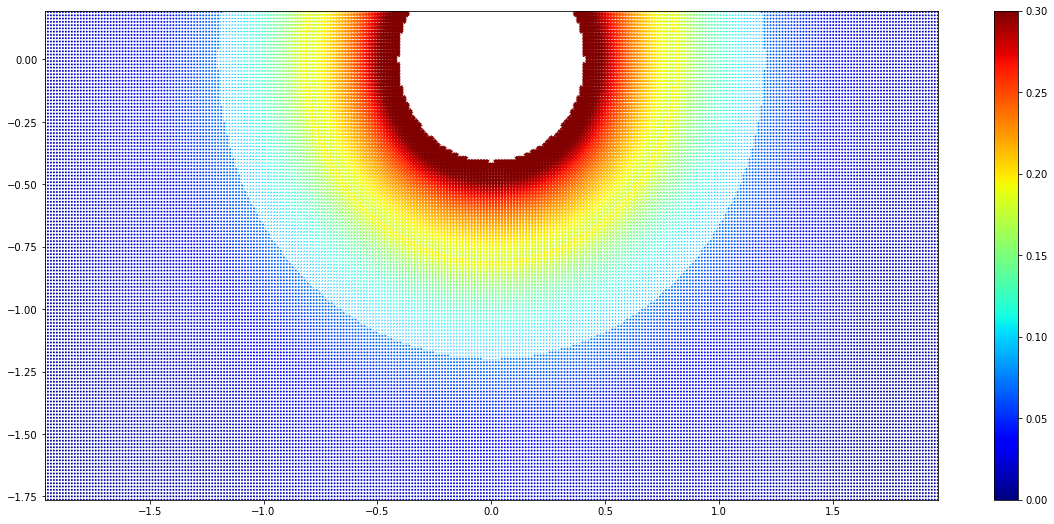

In [286]:
fig, ax = plt.subplots(figsize=(20, 9))
plt.xlim(-500*px2m, 500*px2m)
plt.ylim(-450*px2m, 50*px2m)

plt.quiver(xx, yy, u, v, np.sqrt(u**2 + v**2), cmap="jet")

plt.colorbar()
plt.clim(0, 0.3)
plt.show()

In [287]:
px2m = 1000 / np.sqrt((498 - 488)**2 + (391 - 646)**2)/1e3
fps = 25

C:\Users\wada\anaconda3\envs\cbi_venv\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


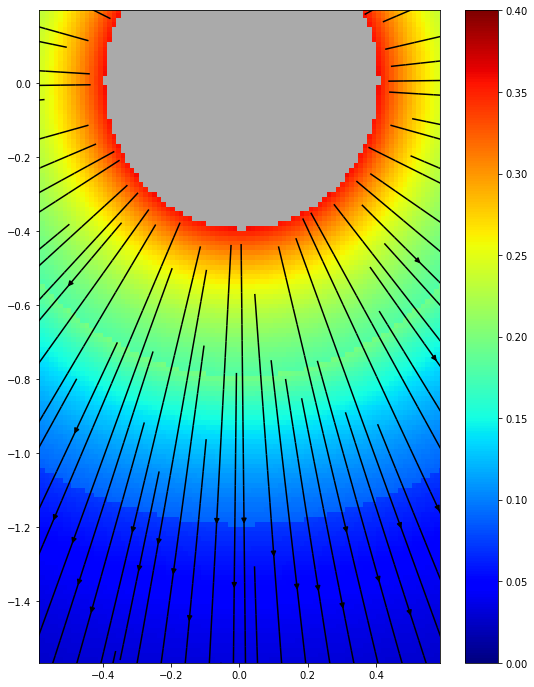

In [288]:
fig, ax = plt.subplots(figsize=(9, 12))
ax.set_facecolor('#aaa')
plt.xlim(-150*px2m, 150*px2m)
plt.ylim(-400*px2m, 50*px2m)

plt.streamplot(xx, yy, u, v, color='k', density=3)
plt.pcolormesh(xx, yy, np.sqrt(u**2 + v**2), cmap='jet', alpha=1)

plt.colorbar()
plt.clim(0, 0.4)
plt.show()

fig.savefig('model_r1_r_15_r2.png')

In [289]:
a, b = 0.6435914139761832, -1.6478683559414669

In [290]:
u = a * np.exp(b * np.sqrt((xx - x1)**2 + (yy - y1)**2)) * (xx - x1) / np.sqrt((xx - x1)**2 + (yy - y1)**2)
v = a * np.exp(b * np.sqrt((xx - x1)**2 + (yy - y1)**2)) * (yy - y1) / np.sqrt((xx - x1)**2 + (yy - y1)**2)

In [291]:
for j in range(xx.shape[0]):
    for i in range(xx.shape[1]):
        if np.sqrt((xx[j, i])**2 + yy[j, i]**2) < 0.4:
            u[j, i] = np.nan
            v[j, i] = np.nan

C:\Users\wada\anaconda3\envs\cbi_venv\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


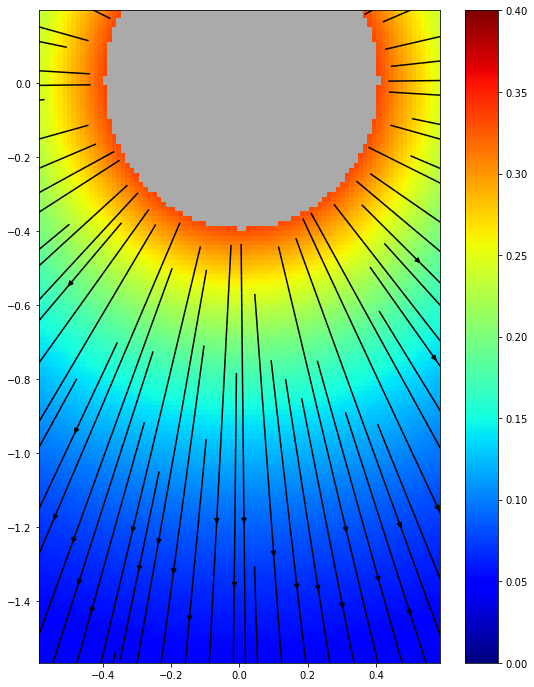

In [292]:
fig, ax = plt.subplots(figsize=(9, 12))
ax.set_facecolor('#aaa')
plt.xlim(-150*px2m, 150*px2m)
plt.ylim(-400*px2m, 50*px2m)

plt.streamplot(xx, yy, u, v, color='k', density=3)
plt.pcolormesh(xx, yy, np.sqrt(u**2 + v**2), cmap='jet', alpha=1)

plt.colorbar()
plt.clim(0, 0.4)
plt.show()

fig.savefig('model_exp.png')